In [1]:
import torch
import numpy as np

import os
os.chdir('..')
from torch_geometric.loader import DataLoader
from gnn_library.util import train, save, load
from evaluate import evaluate_model, pp_output
import instance_generator as ig
import torch_converter as tc
import evaluate as ev
import osmnx as ox
from util import Dataset
from gnn_library.OBM_threshold_greedy import OBM_Threshold_Greedy

%load_ext autoreload
%autoreload 2

In [22]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("PyTorch has version {}".format(torch.__version__))
print('Using device:', device)

PyTorch has version 1.12.0+cu102
Using device: cuda:0


In [23]:
args = {
    'processor':         'GENConv',
    'head':              'regression',
    'num_layers':        2,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        32,
    'node_feature_dim':  5,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        64,
    'output_dim':        1,
    'dropout':           0.35,
    'epochs':            25,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device,
    'noise':             0 # Set to 0 to not train on noisy features
}

# Hyperparameter optimized for 9/7

# args = {
#     'processor':         'GENConv',
#     'head':              'regression',     
#     'num_layers':        4,
#     'num_mlp_layers':    2,
#     'aggr':              'max',
#     'batch_size':        8,
#     'node_feature_dim':  5,
#     'edge_feature_dim':  1,
#     'graph_feature_dim': 2,
#     'hidden_dim':        58,
#     'output_dim':        1,
#     'dropout':           0.066,
#     'epochs':            80,
#     'opt':               'adagrad',
#     'opt_scheduler':     'none',
#     'opt_restart':       0,
#     'weight_decay':      5e-3,
#     'lr':                0.0022434,
#     'device':            device,
#     'noise':             0 # Set to 0 to not train on noisy features
# }

# Hyperparam optimized for 6,10

args = {
    'processor':         'GENConv',
    'head':              'regression',     
    'num_layers':        5,
    'num_mlp_layers':    5,
    'aggr':              'max',
    'batch_size':        2,
    'node_feature_dim':  5,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        128,
    'output_dim':        1,
    'dropout':           0.0115,
    'epochs':            32,
    'opt':               'adagrad',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0083,
    'device':            device,
    'noise':             0 # Set to 0 to not train on noisy features
}

# Hyperparam optimized for 10,6

args = {
    'processor':         'GENConv',
    'head':              'regression',     
    'num_layers':        3,
    'num_mlp_layers':    3,
    'aggr':              'max',
    'batch_size':        8,
    'node_feature_dim':  5,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        32,
    'output_dim':        1,
    'dropout':           0.0306,
    'epochs':            64,
    'opt':               'adagrad',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0121,
    'device':            device,
    'noise':             0 # Set to 0 to not train on noisy features
}

In [21]:
train_num = 200; test_num = 100
node_config = (10,6)

er_config = {
    'graph_type': 'ER',
    'p': 0.75,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 4,
    'weighted': True
}
geom_config = {
    'graph_type': 'GEOM',
    'q': 0.25,
    'd': 2,
    'weighted': True
}

rng = np.random.default_rng()


train_instances = [
        *ig.sample_instances(*node_config, train_num, rng, args, **er_config),
        *ig.sample_instances(*node_config, train_num, rng, args, **ba_config),
        *ig.sample_instances(*node_config, train_num, rng, args, **geom_config),
    ]

test_instances = [
        *ig.sample_instances(*node_config, test_num, rng, args, **er_config),
        *ig.sample_instances(*node_config, test_num, rng, args, **ba_config),
        *ig.sample_instances(*node_config, test_num, rng, args, **geom_config),
    ]


train_data = Dataset(tc._instances_to_train_samples(train_instances, args['head']))
test_data = Dataset(tc._instances_to_train_samples(test_instances, args['head']))

train_loader = DataLoader(
    train_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    test_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

In [22]:
_, _, _, GNN, _ = train(train_loader, test_loader, args)

Training:   0%|          | 0/64 [00:00<?, ?Epochs/s]/home/alexhay/.local/lib/python3.10/site-packages/torch_geometric/utils/scatter.py:93: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(f"The usage of `scatter(reduce='{reduce}')` "


TRAINING LOSS: 0.03216764100088879


Training:   2%|▏         | 1/64 [00:23<24:37, 23.46s/Epochs]

TEST LOSS: 0.01455609779804945
TEST ACCURACY: 0.8974359035491943


Training:   3%|▎         | 2/64 [00:40<20:13, 19.57s/Epochs]

TRAINING LOSS: 0.018142962133289118


Training:   5%|▍         | 3/64 [00:57<18:45, 18.44s/Epochs]

TRAINING LOSS: 0.016536819550372964


Training:   6%|▋         | 4/64 [01:14<17:50, 17.84s/Epochs]

TRAINING LOSS: 0.015344425928623917
TRAINING LOSS: 0.015233540981227093


Training:   8%|▊         | 5/64 [01:38<19:43, 20.07s/Epochs]

TEST LOSS: 0.01709643006324768
TEST ACCURACY: 0.9003944993019104


Training:   9%|▉         | 6/64 [01:55<18:22, 19.00s/Epochs]

TRAINING LOSS: 0.014382488927292911


Training:  11%|█         | 7/64 [02:12<17:30, 18.42s/Epochs]

TRAINING LOSS: 0.013756659103996143


Training:  12%|█▎        | 8/64 [02:29<16:46, 17.98s/Epochs]

TRAINING LOSS: 0.013859007639050227
TRAINING LOSS: 0.013194921573695213


Training:  14%|█▍        | 9/64 [02:52<18:01, 19.66s/Epochs]

TEST LOSS: 0.015891214832663536
TEST ACCURACY: 0.8969427943229675


Training:  16%|█▌        | 10/64 [03:09<16:47, 18.66s/Epochs]

TRAINING LOSS: 0.013230944684857063


Training:  17%|█▋        | 11/64 [03:26<15:58, 18.08s/Epochs]

TRAINING LOSS: 0.012974280179116494


Training:  19%|█▉        | 12/64 [03:42<15:16, 17.63s/Epochs]

TRAINING LOSS: 0.013012339891326118
TRAINING LOSS: 0.012982169686875199


Training:  20%|██        | 13/64 [04:06<16:33, 19.48s/Epochs]

TEST LOSS: 0.012565651908516884
TEST ACCURACY: 0.9038461446762085


Training:  22%|██▏       | 14/64 [04:23<15:34, 18.69s/Epochs]

TRAINING LOSS: 0.012385881506136254


Training:  23%|██▎       | 15/64 [04:40<14:47, 18.12s/Epochs]

TRAINING LOSS: 0.012147981235493347


Training:  25%|██▌       | 16/64 [04:56<14:11, 17.75s/Epochs]

TRAINING LOSS: 0.012114186927850752
TRAINING LOSS: 0.012165346990641477


Training:  27%|██▋       | 17/64 [05:20<15:21, 19.61s/Epochs]

TEST LOSS: 0.011176448315382004
TEST ACCURACY: 0.9053254723548889


Training:  28%|██▊       | 18/64 [05:38<14:28, 18.88s/Epochs]

TRAINING LOSS: 0.011952758117541028


Training:  30%|██▉       | 19/64 [05:55<13:45, 18.34s/Epochs]

TRAINING LOSS: 0.012037403329416798


Training:  31%|███▏      | 20/64 [06:11<13:05, 17.85s/Epochs]

TRAINING LOSS: 0.011457288855257297
TRAINING LOSS: 0.011867890741248902


Training:  33%|███▎      | 21/64 [06:35<14:06, 19.68s/Epochs]

TEST LOSS: 0.012202654965221882
TEST ACCURACY: 0.9137080907821655


Training:  34%|███▍      | 22/64 [06:53<13:18, 19.01s/Epochs]

TRAINING LOSS: 0.01186709345540011


Training:  36%|███▌      | 23/64 [07:10<12:35, 18.43s/Epochs]

TRAINING LOSS: 0.011801527328582528


Training:  38%|███▊      | 24/64 [07:27<12:03, 18.08s/Epochs]

TRAINING LOSS: 0.011177653772239693
TRAINING LOSS: 0.01123773350889086


Training:  39%|███▉      | 25/64 [07:52<13:00, 20.01s/Epochs]

TEST LOSS: 0.009376714937388897
TEST ACCURACY: 0.9137080907821655


Training:  41%|████      | 26/64 [08:09<12:07, 19.14s/Epochs]

TRAINING LOSS: 0.011347830139385345


Training:  42%|████▏     | 27/64 [08:26<11:25, 18.53s/Epochs]

TRAINING LOSS: 0.01106344146812484


Training:  44%|████▍     | 28/64 [08:43<10:54, 18.19s/Epochs]

TRAINING LOSS: 0.011184583159000526
TRAINING LOSS: 0.010960140737042327


Training:  45%|████▌     | 29/64 [09:07<11:40, 20.00s/Epochs]

TEST LOSS: 0.011051524430513382
TEST ACCURACY: 0.9102564454078674


Training:  47%|████▋     | 30/64 [09:25<10:57, 19.33s/Epochs]

TRAINING LOSS: 0.011154542834200563


Training:  48%|████▊     | 31/64 [09:42<10:11, 18.53s/Epochs]

TRAINING LOSS: 0.010848695179849458


Training:  50%|█████     | 32/64 [09:59<09:40, 18.15s/Epochs]

TRAINING LOSS: 0.01101204984650273
TRAINING LOSS: 0.010692113793068066


Training:  52%|█████▏    | 33/64 [10:23<10:20, 20.01s/Epochs]

TEST LOSS: 0.016236433759331703
TEST ACCURACY: 0.9028599858283997


Training:  53%|█████▎    | 34/64 [10:41<09:34, 19.15s/Epochs]

TRAINING LOSS: 0.01112199358678849


Training:  55%|█████▍    | 35/64 [10:58<09:00, 18.64s/Epochs]

TRAINING LOSS: 0.01069591820019535


Training:  56%|█████▋    | 36/64 [11:15<08:30, 18.23s/Epochs]

TRAINING LOSS: 0.010768865094819875
TRAINING LOSS: 0.010989487807825667


Training:  58%|█████▊    | 37/64 [11:40<09:01, 20.04s/Epochs]

TEST LOSS: 0.00920663308352232
TEST ACCURACY: 0.918639063835144


Training:  59%|█████▉    | 38/64 [11:57<08:21, 19.30s/Epochs]

TRAINING LOSS: 0.010680981191695103


Training:  61%|██████    | 39/64 [12:15<07:47, 18.71s/Epochs]

TRAINING LOSS: 0.010771455854618446


Training:  62%|██████▎   | 40/64 [12:32<07:18, 18.25s/Epochs]

TRAINING LOSS: 0.010665037028914096
TRAINING LOSS: 0.010625254277842701


Training:  64%|██████▍   | 41/64 [12:56<07:41, 20.08s/Epochs]

TEST LOSS: 0.01140876580029726
TEST ACCURACY: 0.9053254723548889


Training:  66%|██████▌   | 42/64 [13:13<07:03, 19.26s/Epochs]

TRAINING LOSS: 0.010380822948596996


Training:  67%|██████▋   | 43/64 [13:31<06:33, 18.73s/Epochs]

TRAINING LOSS: 0.010914346167723545


Training:  69%|██████▉   | 44/64 [13:49<06:09, 18.47s/Epochs]

TRAINING LOSS: 0.010497428218199057
TRAINING LOSS: 0.010262478783648603


Training:  70%|███████   | 45/64 [14:14<06:28, 20.44s/Epochs]

TEST LOSS: 0.01059815101325512
TEST ACCURACY: 0.908777117729187


Training:  72%|███████▏  | 46/64 [14:31<05:49, 19.39s/Epochs]

TRAINING LOSS: 0.01041703161665235


Training:  73%|███████▎  | 47/64 [14:48<05:19, 18.82s/Epochs]

TRAINING LOSS: 0.010347358861756677


Training:  75%|███████▌  | 48/64 [15:06<04:53, 18.37s/Epochs]

TRAINING LOSS: 0.01023442524045467
TRAINING LOSS: 0.010455685716154543


Training:  77%|███████▋  | 49/64 [15:30<05:02, 20.17s/Epochs]

TEST LOSS: 0.010449191555380821
TEST ACCURACY: 0.908777117729187


Training:  78%|███████▊  | 50/64 [15:47<04:30, 19.30s/Epochs]

TRAINING LOSS: 0.010403857082725674


Training:  80%|███████▉  | 51/64 [16:05<04:03, 18.72s/Epochs]

TRAINING LOSS: 0.01017893855029352


Training:  81%|████████▏ | 52/64 [16:22<03:41, 18.45s/Epochs]

TRAINING LOSS: 0.010522302585101598
TRAINING LOSS: 0.010023658838853443


Training:  83%|████████▎ | 53/64 [16:48<03:47, 20.66s/Epochs]

TEST LOSS: 0.011058488860726357
TEST ACCURACY: 0.9151873588562012


Training:  84%|████████▍ | 54/64 [17:06<03:17, 19.70s/Epochs]

TRAINING LOSS: 0.010281075426272854


Training:  86%|████████▌ | 55/64 [17:23<02:51, 19.00s/Epochs]

TRAINING LOSS: 0.010191856688359332


Training:  88%|████████▊ | 56/64 [17:41<02:28, 18.56s/Epochs]

TRAINING LOSS: 0.010221019618755205
TRAINING LOSS: 0.010217668755386489


Training:  89%|████████▉ | 57/64 [18:06<02:24, 20.61s/Epochs]

TEST LOSS: 0.010816583409905434
TEST ACCURACY: 0.9181459546089172


Training:  91%|█████████ | 58/64 [18:23<01:56, 19.49s/Epochs]

TRAINING LOSS: 0.010062068589054663


Training:  92%|█████████▏| 59/64 [18:40<01:33, 18.69s/Epochs]

TRAINING LOSS: 0.009929440269056069


Training:  94%|█████████▍| 60/64 [18:56<01:12, 18.08s/Epochs]

TRAINING LOSS: 0.010182858900191164
TRAINING LOSS: 0.010349988489516272


Training:  95%|█████████▌| 61/64 [19:20<00:59, 19.89s/Epochs]

TEST LOSS: 0.011190847493708134
TEST ACCURACY: 0.9092702269554138


Training:  97%|█████████▋| 62/64 [19:38<00:38, 19.06s/Epochs]

TRAINING LOSS: 0.010023406659839756


Training:  98%|█████████▊| 63/64 [19:54<00:18, 18.36s/Epochs]

TRAINING LOSS: 0.010177172276589895


Training: 100%|██████████| 64/64 [20:11<00:00, 18.93s/Epochs]

TRAINING LOSS: 0.010133509131885706


In [23]:
save(GNN, args, 'GNN2_regression_hyperparam_tuned')

In [ ]:
# GNN, args = load('GNN2', device)

In [ ]:
from gnn_library.OBM_greedy import OBM_Greedy
from gnn_library.OBM_threshold_greedy import OBM_Threshold_Greedy

thresholds = np.linspace(0, 1, 101)
thresholded_greedy_models = [(threshold, OBM_Threshold_Greedy(threshold)) for threshold in thresholds]

seed = np.random.randint(0, 500000)
(m, n) = (8, 16)
config = er_config

rng = np.random.default_rng(seed)
eval_instances = ig.sample_instances(m, n, 10, rng, **config)

ratios2 = evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[GNN],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)

greedy_ratios = {}
for threshold, model in thresholded_greedy_models: 
    ratio = evaluate_model(
        meta_model=None,
        meta_model_type=None,
        base_models=[model],
        instances=eval_instances,
        batch_size=50,
        rng=rng,
        num_realizations=5
    )
    greedy_ratios[threshold] = np.mean(ratio[0])
pp_output(ratios2, _, show_log=False)
print(greedy_ratios)

In [ ]:
max_threshold = max(greedy_ratios, key = greedy_ratios.get)
print(max_threshold, greedy_ratios[max_threshold])

# Pivot to feature-generated graphs

In [ ]:
def get_location_graph(city):
	location_graph = ox.graph_from_place(city, network_type="drive")
	location_graph = ox.speed.add_edge_speeds(location_graph)
	location_graph = ox.speed.add_edge_travel_times(location_graph)
	return {'location_graph': location_graph, 'city': city}

In [ ]:
piedmont = get_location_graph("Piedmont, California, USA")
# san_francisco = get_location_graph("San Francisco, California, USA")
founex = get_location_graph("Founex, Switzerland")
carmel = get_location_graph("Carmel, Indiana, USA")
geneva = get_location_graph("Geneva, Switzerland")

In [ ]:
args = {
    'processor':         'GENConv',
    'head':              'regression',
    'num_layers':        2,
    'num_mlp_layers':    2,
    'aggr':              'max',
    'batch_size':        32,
    'node_feature_dim':  4,
    'edge_feature_dim':  1,
    'graph_feature_dim': 2,
    'hidden_dim':        64,
    'output_dim':        1,
    'dropout':           0.35,
    'epochs':            25,
    'opt':               'adam',
    'opt_scheduler':     'none',
    'opt_restart':       0,
    'weight_decay':      5e-3,
    'lr':                0.0001,
    'device':            device
}

train_num = 100; test_num = 30

er_config = {
    'graph_type': 'ER',
    'p': 0.75,
    'weighted': True
}
ba_config = {
    'graph_type': 'BA',
    'ba_param': 2,
    'weighted': True
}
feat_config = {
    'graph_type': 'FEAT',
    'q': 0.85,
    'weighted': True
}
# osmnx_config = {
#     'graph_type': 'OSMNX',
#     'location_graph': piedmont['location_graph']
# }
# osmnx_config_2 = {
#     'graph_type': 'OSMNX',
#     'location_graph': san_francisco['location_graph']
# }

# ox.plot_graph(piedmont['location_graph'])
# ox.plot_graph(san_francisco['location_graph'])

# part_config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 4,
#     'eps': 0.1
# },
# part_config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 3,
#     'eps': 0.3
# }

rng = np.random.default_rng()


train_instances = [
        *ig.sample_instances(8, 8, train_num, rng, **er_config),
        *ig.sample_instances(8, 8, train_num, rng, **ba_config),
        *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config_2),
        # *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **part_config),
    ]

test_instances = [
        *ig.sample_instances(8, 8, test_num, rng, **er_config),
        *ig.sample_instances(8, 8, test_num, rng, **ba_config),
        *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config),
        # *ig.sample_instances(8, 8, train_num, rng, **osmnx_config_2),
        # *ig.sample_instances(8, 8, train_num, rng, **feat_config),
        # *ig.sample_instances(8, 8, train_num, rng, **part_config),
    ]


train_data = Dataset(tc._instances_to_train_samples(train_instances, args['head']))
test_data = Dataset(tc._instances_to_train_samples(test_instances, args['head']))

train_loader = DataLoader(
    train_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

test_loader = DataLoader(
    test_data,
    batch_size=args['batch_size'],
    shuffle=True,
    num_workers=4
)

In [ ]:
_, _, _, GNN, _ = train(train_loader, test_loader, args)

## Set up the threshold greedy value
The instance set used to determine the threshold should be the same as the training set for the base models. Here we reduce the number of instances to make the evaluation faster.

For the moment, the instance set is the evaluation set since they are too different and would disadvantage threshold greedy.

In [13]:
seed = np.random.randint(0, 500000)
rng = np.random.default_rng(seed)


thresholds = np.linspace(0, 1, 101)
thresholded_greedy_models = {threshold: OBM_Threshold_Greedy(threshold) for threshold in thresholds}

node_configs = util.node_configs_gnn2
graph_configs = util.graph_configs_standard
train_num = 5
train_instances = [
        ig.sample_instances(node_config[0], node_config[1], train_num, rng, args, **graph_config)
        for graph_config in graph_configs
        for node_config in node_configs
]

# flat map the train instances
train_instances = [instance for instances in train_instances for instance in instances]


In [14]:
from tqdm import tqdm
import gnn_library.util as util

greedy_ratios = {}
for threshold, model in tqdm(thresholded_greedy_models.items()): 
    rng = np.random.default_rng(seed)
    ratio, _ = ev.evaluate_model(
        meta_model=None,
        meta_model_type=None,
        base_models=[model],
        instances=train_instances,
        batch_size=50,
        rng=rng,
        num_realizations=5
    )
    greedy_ratios[threshold] = np.mean(ratio['learned'])
    

max_threshold = max(greedy_ratios, key = greedy_ratios.get)
print(f"Best threshold value: {max_threshold} achieves CR: {greedy_ratios[max_threshold]}")
THRESHOLD_MODEL = thresholded_greedy_models[max_threshold]

  0%|          | 0/101 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 101/101 [24:03<00:00, 14.29s/it]

Best threshold value: 0.35000000000000003 achieves CR: 0.2798586880504665


In [16]:
print(greedy_ratios)

{0.0: 0.991188005856922, 0.01: 0.991188005856922, 0.02: 0.991188005856922, 0.03: 0.991188005856922, 0.04: 0.991188005856922, 0.05: 0.991188005856922, 0.06: 0.991188005856922, 0.07: 0.991188005856922, 0.08: 0.991188005856922, 0.09: 0.991188005856922, 0.1: 0.991188005856922, 0.11: 0.991188005856922, 0.12: 0.991188005856922, 0.13: 0.991188005856922, 0.14: 0.991188005856922, 0.15: 0.991188005856922, 0.16: 0.991188005856922, 0.17: 0.991188005856922, 0.18: 0.991188005856922, 0.19: 0.991188005856922, 0.2: 0.991188005856922, 0.21: 0.991188005856922, 0.22: 0.991188005856922, 0.23: 0.991188005856922, 0.24: 0.991188005856922, 0.25: 0.9902019295044397, 0.26: 0.9902019295044397, 0.27: 0.9902019295044397, 0.28: 0.9902019295044397, 0.29: 0.9902019295044397, 0.3: 0.9902019295044397, 0.31: 0.9902019295044397, 0.32: 0.9902019295044397, 0.33: 0.9902019295044397, 0.34: 0.9902019295044397, 0.35000000000000003: 0.9902019295044397, 0.36: 0.9902019295044397, 0.37: 0.9902019295044397, 0.38: 0.9843320526626002,

## Evaluation

In [ ]:
seed = np.random.randint(0, 500000)
(m, n) = (32, 16)
# config = {
#     'graph_type': 'FEAT',
#     'q': 0.85,
#     'weighted': True
# }
# config = {
#     'graph_type': 'OSMNX',
#     'location_graph': piedmont['location_graph']
# }
# config = {
# 	'graph_type': 'PART',
#     'p': 0.5,
#     'size': 4,
#     'eps': 0.1
# }

rng = np.random.default_rng(seed)
# eval_instances = ig.sample_instances(m, n, 100, rng, **config)
eval_num = 25
eval_instances = [
        *ig.sample_instances(m, n, eval_num, rng, **er_config),
        *ig.sample_instances(m, n, eval_num, rng, **ba_config),
        *ig.sample_instances(m, n, eval_num, rng, **feat_config),
        *ig.sample_instances(m, n, eval_num, rng, **osmnx_config),
]

ratios = ev.evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[GNN],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)


ratios2 = ev.evaluate_model(
    meta_model=None,
    meta_model_type=None,
    base_models=[THRESHOLD_MODEL],
    instances=eval_instances,
    batch_size=50,
    rng=rng,
    num_realizations=5
)

pp_output(ratios, _, show_log=False)
print(f"Thresholded greedy: {np.mean(ratios2[0]).round(4)}")


## Box plot baseline evaluation

In [10]:
GNN, args = load('GNN2_hyperparam_tuned', device)
GNN_classify, _ = load('GNN2_classification_hyperparam_tuned', device)

In [25]:
import gnn_library.util as util
import pickle

num_trials = 100
threshold = 0.35 # TODO set up value
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]

models = [("GNN", GNN)]
t_greedy = OBM_Threshold_Greedy(threshold) 

node_configs = util.node_configs_gnn
graph_configs = util.graph_configs_standard

data = {node_config: {} for node_config in node_configs}

for node_config in node_configs:
    for graph_config in graph_configs:
            print(graph_config)
            seed = np.random.randint(0, 500000)
            rng = np.random.default_rng(seed)
            instances = ig.sample_instances(*node_config, num_trials, rng, args, **graph_config)


            rng = np.random.default_rng(seed)

            for model_name, model in models:
                cr_ratios, _ = evaluate_model(
                    meta_model=None,
                    meta_model_type=None,
                    base_models=[model],
                    instances=instances,
                    batch_size=batch_size,
                    rng=rng,
                    num_realizations=5,
                    baselines=['greedy', 'lp_rounding'],
                )

                data[node_config][frozenset(graph_config.items())] = cr_ratios

                t_greedy_ratio, _ = evaluate_model(
                    meta_model=None,
                    meta_model_type=None,
                    base_models=[t_greedy],
                    instances=instances,
                    batch_size=batch_size,
                    rng=rng,
                    num_realizations=5,
                )

                # Threshold greedy is considered as a model here
                data[node_config][frozenset(graph_config.items())]['threshold_greedy'] = t_greedy_ratio['learned']

                classify_ratio, _ = evaluate_model(
                    meta_model=None,
                    meta_model_type=None,
                    base_models=[GNN_classify],
                    instances=instances,
                    batch_size=batch_size,
                    rng=rng,
                    num_realizations=5,
                )

                # Threshold greedy is considered as a model here
                data[node_config][frozenset(graph_config.items())]['classify'] = classify_ratio['learned']
                
                with open(f"saved_runs/temp_classify/box_plot_regress_classify_eval_gnn2_base.pickle", 'wb') as handle:
                    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)


{'graph_type': 'ER', 'p': 0.25, 'weighted': True}


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'graph_type': 'ER', 'p': 0.5, 'weighted': True}


/home/alexhay/GNN-OBM/algorithms.py:257: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom_matrix


{'graph_type': 'ER', 'p': 0.75, 'weighted': True}
{'graph_type': 'BA', 'ba_param': 4, 'weighted': True}
{'graph_type': 'BA', 'ba_param': 6, 'weighted': True}
{'graph_type': 'BA', 'ba_param': 8, 'weighted': True}
{'graph_type': 'GEOM', 'q': 0.15, 'd': 2, 'weighted': True}
{'graph_type': 'GEOM', 'q': 0.25, 'd': 2, 'weighted': True}
{'graph_type': 'GEOM', 'q': 0.5, 'd': 2, 'weighted': True}
{'graph_type': 'OSMNX', 'location': 'Piedmont, California, USA'}
{'graph_type': 'OSMNX', 'location': 'Fremont, California, USA'}
{'graph_type': 'GM'}


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [26]:
import pickle

with open(f"saved_runs/box_plot_regression_eval_gnn2_base.pickle", 'wb') as handle:
    pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
import pickle
import gnn_library.util as util
with open(f'saved_runs/box_plot_regression_eval_gnn2_base.pickle', 'rb') as handle:
    data_copy = pickle.load(handle)

In [6]:
filtered_data = {}
for graph_type, val in data_copy[util.node_configs_gnn[0]].items():
	if dict(graph_type) in util.graph_configs_main:
		filtered_data[graph_type] = val
print(filtered_data.keys())

dict_keys([frozenset({('graph_type', 'ER'), ('weighted', True), ('p', 0.5)}), frozenset({('d', 2), ('graph_type', 'GEOM'), ('weighted', True), ('q', 0.25)}), frozenset({('graph_type', 'OSMNX'), ('location', 'Fremont, California, USA')}), frozenset({('graph_type', 'GM')})])


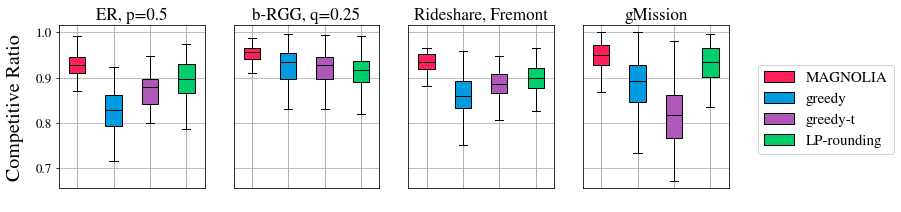

In [19]:
from util import _box_plots
_box_plots(filtered_data, lambda graph_type: f"GNN2_classify_{graph_type} {node_config[1]}x{node_config[0]}")

### Baseline ER/BA/GEOM evaluation

In [24]:
GNN1, args = load("GNN1_hyperparam_tuned", device)
GNN2, _ = load("GNN2_regression_hyperparam_tuned", device)
args = args.__dict__

In [34]:
num_trials = 50
node_configs = [(x, 16) for x in np.arange(8, 65, 4)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]

models = [("GNN1", GNN1), ("GNN2", GNN2)]

graph_configs = [
    {
        'graph_type': 'ER',
        'p': 0.75,
        'weighted': True
    },
    # {
    #     'graph_type': 'BA',
    #     'ba_param': 4,
    #     'weighted': True
    # },
    # {
    #     'graph_type': 'GEOM',
    #     'threshold': 0.2,
    #     'scaling': 1 / np.sqrt(2),
    #     'weighted': True
    # }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {frozenset(config.items()): [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(graph_config, node_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, args, **graph_config)


        rng = np.random.default_rng(seed)

        baselines = []
        cr_ratios = {}
        for model_name, model in models:
            model_ratios, _ = evaluate_model(
                meta_model=None,
                meta_model_type=None,
                base_models=[model],
                instances=instances,
                batch_size=batch_size,
                rng=rng,
                num_realizations=5,
                baselines=baselines
            )

            cr_ratios[model_name] = model_ratios.pop("learned")
        print(cr_ratios)

        data[frozenset(graph_config.items())].append(cr_ratios)

[0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0]
{'graph_type': 'ER', 'p': 0.75, 'weighted': True} (8, 16)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'GNN1': array([1.        , 1.        , 1.        , 0.9935445 , 1.        ,
       0.98954762, 0.94722625, 0.98970714, 0.99901968, 1.        ,
       0.99244456, 0.98381396, 0.99272661, 0.98992065, 0.99652307,
       1.        , 0.97812211, 0.99267467, 0.99789134, 1.        ,
       1.        , 0.98542265, 0.99281464, 0.99610756, 0.98281964,
       0.99882653, 0.98424541, 1.        , 0.9830664 , 0.99064163,
       0.9807594 , 0.9993503 , 0.99985967, 0.98050466, 0.98991873,
       0.9996859 , 1.        , 0.98664614, 0.9998382 , 0.99258103,
       0.99534306, 1.        , 0.98284249, 0.99720087, 0.97980065,
       0.99132787, 0.99298425, 0.98844096, 0.95681234, 0.97878369]), 'GNN2': array([0.98453208, 0.99564218, 0.9833222 , 0.98699829, 1.        ,
       0.98496943, 0.95479224, 0.95086543, 0.95879837, 0.98306121,
       0.96003596, 0.95631233, 0.99967184, 0.99515042, 0.98440117,
       0.96409056, 0.96964819, 0.96993413, 0.95412847, 0.98538027,
       0.9839148 , 0.97522329, 0.9699205 , 

In [35]:
import pickle
with open(f"saved_runs/bad_regimes.pickle", 'wb') as handle:
	pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [36]:
import pickle
# with open(f"saved_runs/bad_regimes.pickle", 'rb') as handle:
#     data_copy = pickle.load(handle)

node_configs = [(x, 16) for x in np.arange(8, 65, 4)]
ratios = [x/y for (x,y) in node_configs]
print(len(ratios))
print(len(list(data.values())[0]))

15
15


['GNN1', 'GNN2']


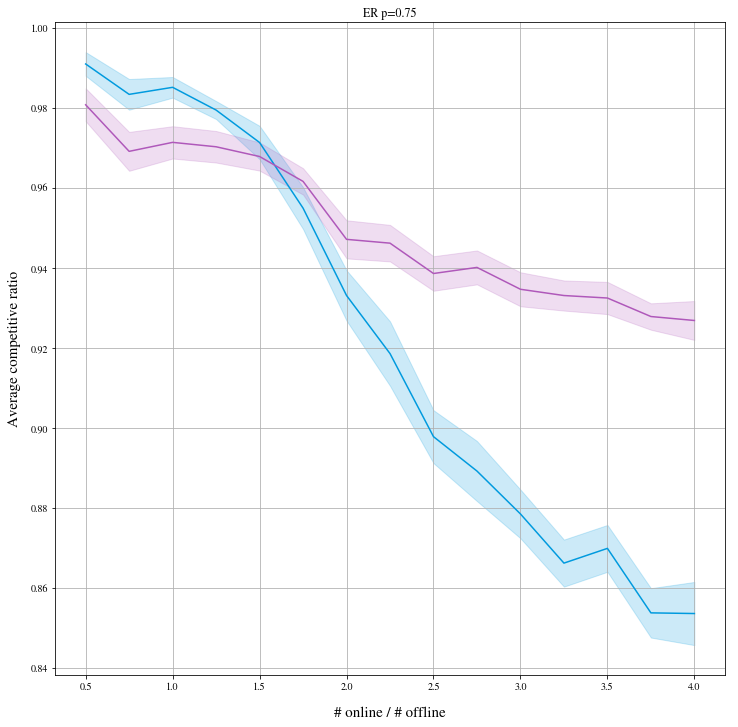

In [39]:
from util import _plot_approx_ratios_single
_plot_approx_ratios_single(ratios, data, lambda graph_type: graph_type, confidence = 0.95)

In [ ]:
import matplotlib.pyplot as plt

ratios = [x/y for (x,y) in node_configs]

for graph_type, comp_ratios in data.items():
    aggregated_ratios = {}

    for trial_ratios in comp_ratios:
        for model, ratio_values in trial_ratios.items():
            current_ratios = aggregated_ratios.get(model, [])
            current_ratios.append(np.array(ratio_values).mean())
            aggregated_ratios[model] = current_ratios

    fig = plt.figure(figsize=(8,6))
    for model, model_ratios in aggregated_ratios.items():
        plt.plot(ratios, model_ratios, label=model)

    title = f"{graph_type}"
    plt.title(title)
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    plt.savefig(f"data/17_01_2024_{title}_no_probabilities.png")
    plt.show()


## Noise experiments

In [4]:
def create_noise_robust_models(noise_values):
    models = []
    for noise_value in noise_values:
        print(f"Training model for noise {noise_value}")
        args = {
        'processor':         'GENConv',
        'head':              'regression',
        'num_layers':        2,
        'num_mlp_layers':    2,
        'aggr':              'max',
        'batch_size':        32,
        'node_feature_dim':  5,
        'edge_feature_dim':  1,
        'graph_feature_dim': 2,
        'hidden_dim':        64,
        'output_dim':        1,
        'dropout':           0.35,
        'epochs':            25,
        'opt':               'adam',
        'opt_scheduler':     'none',
        'opt_restart':       0,
        'weight_decay':      5e-3,
        'lr':                0.0001,
        'device':            device,
        'noise':             noise_value # Set to 0 to not train on noisy features
        }

        train_num = 100; test_num = 30

        er_config = {
            'graph_type': 'ER',
            'p': 0.75,
            'weighted': True
        }
        ba_config = {
            'graph_type': 'BA',
            'ba_param': 2,
            'weighted': True
        }
        geom_config = {
            'graph_type': 'GEOM',
            'threshold': 0.2,
            'scaling': 1 / np.sqrt(2)
        }

        rng = np.random.default_rng()


        train_instances = [
                *ig.sample_instances(9, 7, train_num, rng, args, **er_config),
                *ig.sample_instances(9, 7, train_num, rng, args, **ba_config),
                *ig.sample_instances(9, 7, train_num, rng, args, **geom_config),
            ]

        test_instances = [
                *ig.sample_instances(9, 7, test_num, rng, args, **er_config),
                *ig.sample_instances(9, 7, test_num, rng, args, **ba_config),
                *ig.sample_instances(9, 7, test_num, rng, args, **geom_config),
            ]


        train_data = Dataset(tc._instances_to_train_samples(train_instances, args['head']))
        test_data = Dataset(tc._instances_to_train_samples(test_instances, args['head']))

        train_loader = DataLoader(
            train_data,
            batch_size=args['batch_size'],
            shuffle=True,
            num_workers=4
        )

        test_loader = DataLoader(
            test_data,
            batch_size=args['batch_size'],
            shuffle=True,
            num_workers=4
        )


        _, _, _, GNN, _ = train(train_loader, test_loader, args)
        models.append((f"GNN_{args['noise']}", GNN))
    return models

In [30]:
noise_values = np.linspace(0,5,20)
# models = create_noise_robust_models(noise_values)
models = [GNN] * len(noise_values) # TODO change this

In [31]:
num_trials = 80
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]
node_config = (9,7)
graph_configs = [
    {
        'graph_type': 'ER',
        'p': 0.75,
        'weighted': True
    },
    {
        'graph_type': 'BA',
        'ba_param': 4,
        'weighted': True
    },
    # {
    #     'graph_type': 'GEOM',
    #     'threshold': 0.2,
    #     'scaling': 1 / np.sqrt(2),
    #     'weighted': True
    # }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {config['graph_type']: [] for config in graph_configs}
for graph_config in graph_configs:
    for noise_value, model in zip(noise_values, models):
        print(f"Evaluating model for noise {noise_value}")

        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)

        args['noise'] = noise_value
        instances = ig.sample_instances(*node_config, num_trials, rng, args, **graph_config)

        cr_ratios, _ = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[model],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5,
            baselines=['greedy', 'lp_rounding']
        )

        data[graph_config['graph_type']].append(cr_ratios)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Evaluating model for noise 0.0
Evaluating model for noise 0.2631578947368421


/home/alexhay/GNN-OBM/algorithms.py:258: RuntimeWarning: invalid value encountered in divide
  proposal_probs = x / denom_matrix


Evaluating model for noise 0.5263157894736842
Evaluating model for noise 0.7894736842105263
Evaluating model for noise 1.0526315789473684
Evaluating model for noise 1.3157894736842104
Evaluating model for noise 1.5789473684210527
Evaluating model for noise 1.8421052631578947
Evaluating model for noise 2.1052631578947367
Evaluating model for noise 2.3684210526315788
Evaluating model for noise 2.631578947368421
Evaluating model for noise 2.894736842105263
Evaluating model for noise 3.1578947368421053
Evaluating model for noise 3.4210526315789473
Evaluating model for noise 3.6842105263157894
Evaluating model for noise 3.9473684210526314
Evaluating model for noise 4.2105263157894735
Evaluating model for noise 4.473684210526316
Evaluating model for noise 4.7368421052631575
Evaluating model for noise 5.0
Evaluating model for noise 0.0
Evaluating model for noise 0.2631578947368421
Evaluating model for noise 0.5263157894736842
Evaluating model for noise 0.7894736842105263
Evaluating model for 

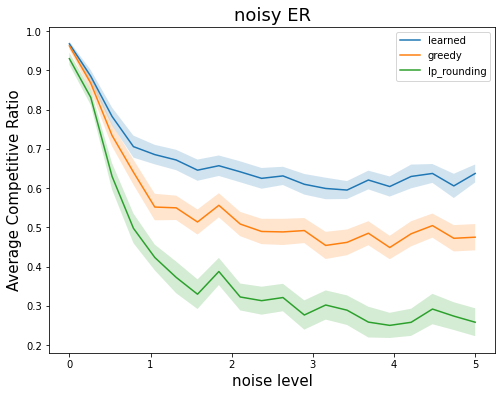

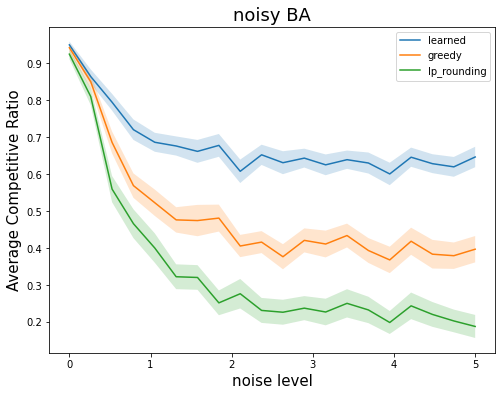

In [33]:
from util import _plot_approx_ratios
_plot_approx_ratios(noise_values, data, lambda graph_type: f"noisy {graph_type}", x_axis_name="noise level", confidence = 0.95)

## FEAT graph evaluation

In [ ]:
num_trials = 40
node_configs = [(x, 16) for x in np.arange(4, 64, 8)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]
graph_configs = [
    {
        'graph_type': 'FEAT',
        'q': 0.75,
        'weighted': True
    },
    # {
    #     'graph_type': 'FEAT',
    #     'q': 0.9,
    #     'weighted': True
    # },
    # {
    #     'graph_type': 'FEAT',
    #     'q': 0.95,
    #     'weighted': True
    # },
    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 4,
    #     'eps': 0.1
    # },
    # {
    #     'graph_type': 'PART',
    #     'p': 0.5,
    #     'size': 3,
    #     'eps': 0.3
    # }
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {config['q']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(graph_config, node_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)


        rng = np.random.default_rng(seed)
        gnn_learned_ratios, greedy_ratios, lp_match_ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )
        ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )


        data[graph_config['q']].append(np.array(
            [
                gnn_learned_ratios,
                greedy_ratios,
                lp_match_ratios
            ]
        ))

In [ ]:
import matplotlib.pyplot as plt
ratios = [x/y for (x,y) in node_configs]
for q, comp_ratios in data.items():
    greedy_avg_ratios = []
    gnn_avg_ratios = []
    lp_match_avg_ratios = []


    for trial_ratios in comp_ratios:
        gnn_avg_ratios.append(np.array(trial_ratios[0]).mean())
        greedy_avg_ratios.append(np.array(trial_ratios[1]).mean())
        lp_match_avg_ratios.append(np.array(trial_ratios[2]).mean())

    # title = f"PART_size_{size}"
    title = f"FEAT_only_ratings_{q}"
    print(title)
    fig = plt.figure(figsize=(8,6))
    plt.title(title)
    plt.plot(ratios, gnn_avg_ratios, label='GNN')
    plt.plot(ratios, greedy_avg_ratios, label='Greedy')
    plt.plot(ratios, lp_match_avg_ratios, label='LP ROUNDING')
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    # plt.savefig(f"data/{title}.png")
    plt.show()


## OSMNX evaluation

In [ ]:
num_trials = 30
node_configs = [(x, 16) for x in np.arange(4, 64, 8)]
# of nodes [20 -> 80]
# of nodes in batch [10,000 -> 40,000]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]

graph_configs = [
    {
        'graph_type': 'OSMNX',
        'location_graph': piedmont['location_graph'],
        'city': piedmont['city']
    },
    # {
    #     'graph_type': 'OSMNX',
    #     'location_graph': carmel['location_graph'],
    #     'city': carmel['city']
    # },
    # {
    #     'graph_type': 'OSMNX',
    #     'location_graph': geneva['location_graph'],
    #     'city': geneva['city']
    # },
    # {
    #     'graph_type': 'OSMNX',
    #     'location_graph': founex['location_graph'],
    #     'city': founex['city']
    # },
]

ratios = [x/y for (x,y) in node_configs]
print(ratios)

data = {config['city']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(node_config, graph_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, **graph_config)


        rng = np.random.default_rng(seed)
        gnn_learned_ratios, greedy_ratios, lp_match_ratios = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5
        )
        thresholded_greedy_ratios = [0]

        data[graph_config['city']].append(np.array(
            [
                gnn_learned_ratios,
                thresholded_greedy_ratios,
                greedy_ratios,
                lp_match_ratios
            ]
        ))

In [ ]:
import matplotlib.pyplot as plt
ratios = [x/y for (x,y) in node_configs]
print(ratios)
for city, comp_ratios in data.items():
    greedy_avg_ratios = []
    thresholded_greedy_avg_ratios = []
    gnn_avg_ratios = []
    lp_match_avg_ratios = []


    for trial_ratios in comp_ratios:
        gnn_avg_ratios.append(np.array(trial_ratios[0]).mean())
        thresholded_greedy_avg_ratios.append(np.array(trial_ratios[1]).mean())
        greedy_avg_ratios.append(np.array(trial_ratios[2]).mean())
        lp_match_avg_ratios.append(np.array(trial_ratios[3]).mean())
        

    title = f"OSMNX_discard_{city}"
    fig = plt.figure(figsize=(8,6))
    plt.title(title)
    plt.plot(ratios, gnn_avg_ratios, label='GNN')
    plt.plot(ratios, thresholded_greedy_avg_ratios, label='Thresholded Greedy')
    plt.plot(ratios, greedy_avg_ratios, label='Greedy')
    plt.plot(ratios, lp_match_avg_ratios, label='LP ROUNDING')
    plt.xlabel('# online / # offline')
    plt.ylabel('Average competitive ratio')
    plt.legend()
    plt.savefig(f"data/{title}.png")
    plt.show()



## Graph transferability

In [20]:
num_trials = 100
node_configs = [(x, x) for x in np.arange(4, 40, 4)]
batch_size = 500 #[int(min(32, x + y)) for (x, y) in node_configs]


graph_configs = [
    {
    'graph_type': 'FEAT',
    'q': 0.75,
    'weighted': True
    },
]

sizes = [x+y for (x,y) in node_configs]
print(sizes)

data = {config['q']: [] for config in graph_configs}
for graph_config in graph_configs:
    for i, node_config in enumerate(node_configs):
        print(node_config, graph_config)
        seed = np.random.randint(0, 500000)
        rng = np.random.default_rng(seed)
        instances = ig.sample_instances(*node_config, num_trials, rng, args, **graph_config)


        rng = np.random.default_rng(seed)

        cr_ratios, _ = evaluate_model(
            meta_model=None,
            meta_model_type=None,
            base_models=[GNN],
            instances=instances,
            batch_size=batch_size,
            rng=rng,
            num_realizations=5,
            baselines=['greedy', 'lp_rounding']
        )

        data[graph_config['q']].append(cr_ratios)

[4, 8, 12, 16, 20, 24, 28, 32, 36]
(4, 4) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}


/home/alexhay/GNN-OBM/evaluate.py:365: RuntimeWarning: Mean of empty slice
  name: np.nanmean(ratio_matrix, axis=1)


(8, 8) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(12, 12) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(16, 16) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(20, 20) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(24, 24) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(28, 28) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(32, 32) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}
(36, 36) {'graph_type': 'FEAT', 'q': 0.75, 'weighted': True}


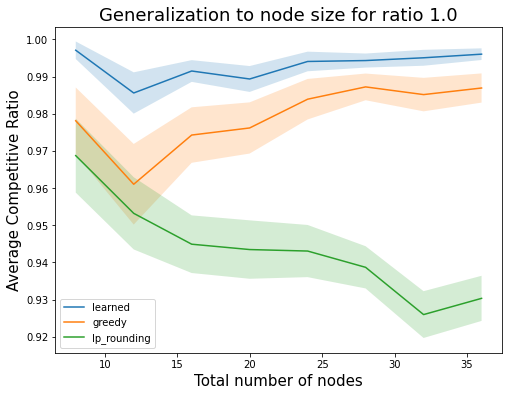

In [23]:
from util import _plot_approx_ratios

_plot_approx_ratios(sizes, data, lambda graph_type: f"Generalization to node size for ratio {node_config[1]/node_config[0]}", x_axis_name= "Total number of nodes", confidence = 0.95)

In [ ]:
import matplotlib.pyplot as plt

sizes = [x for (x,_) in node_configs]

aggregated_ratios = {}
for q, comp_ratios in data.items():
    for trial_ratios in comp_ratios:
        for model, ratio_values in trial_ratios.items():
            current_ratios = aggregated_ratios.get(model, [])
            current_ratios.append(np.array(ratio_values).mean())
            aggregated_ratios[model] = current_ratios

fig = plt.figure(figsize=(8,6))
for model, ratios in aggregated_ratios.items():
    plt.plot(sizes, ratios, label=model)

title = f"16_01_2024_graph_transferability_{q}"
plt.title("Graph transferability NxN ratio - trained on 8x8")
plt.xlabel('Number of online nodes')
plt.ylabel('Average competitive ratio')
plt.legend()
plt.savefig(f"data/{title}.png")
plt.show()
